In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

from textwrap import wrap



from constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200) # enable showing all columns of the df

In [2]:
dataset_file_path = '../data/preprocessed_dataset.csv'
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  \
104                                                  0          
244                                                  1          
508                                                  1          
991                                                  4          
473                                                  1          

     IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  \
104                       NaN     NaN                       NaN    75.0   
244                       NaN     NaN                       NaN    69.0   
508                       NaN     NaN                       NaN    57.0   
991                       NaN     NaN                       NaN   142.0   
473                     293.0     NaN                       NaN    70.0   

     height (cm)        BMI  systolic BP (ciśnienie skurczowe)  \
104        174.0  24.772097                              124.0   
244        168.0  24.447279                              114.0   
508        170.0        NaN                              110.0   
991        160.0  55.468750                              118.0   
473        175.0  22.857143                              120.0   

     diastolic BP (ciśnienie rozskurczowe)  Hypertension  \
104                                   85.0           0.0   
244                                   82.0           0.0   
508                                   74.0           NaN   
991                                   78.0           0.0   
473                                   86.0           0.0   

     Waist Circumference (WC)  WC>88  Hip Circumference (HC)  \
104                       NaN    NaN                     NaN   
244                      73.0    0.0                    90.0   
508                      66.0    NaN                    97.0   
991                       NaN    NaN                     NaN   
473                      82.0    0.0                    85.0   

     WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  \
104                    NaN             NaN              NaN   
244               0.811111             0.0              1.0   
508                    NaN             NaN              NaN   
991                    NaN             NaN              NaN   
473               0.964706             1.0              1.0   

     WHTR (Waist/Height Ratio)  WHTR>0,5  \
104                        NaN       NaN   
244                   0.434524       0.0   
508                        NaN       NaN   
991                        NaN       NaN   
473                   0.468571       0.0   

     overweight/obesity 0-normal/low, 1-overweight, 2-obesity  \
104                                                0.0          
244                                                0.0          
508                                                NaN          
991                                                2.0          
473                                                0.0          

     irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  \
104                              0.0                           NaN   
244                              1.0                           1.0   
508                              1.0                           1.0   
991                              1.0                           NaN   
473                              1.0                           0.0   

     PCO ovary morfology in USG (0-brak, 1--obecna)  \
104                                             0.0   
244                                             1.0   
508                                             NaN   
991                                             0.0   
473                                             1.0   

     stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  \
104                                              1.0   1.0        1.0   
244                                              1.0   1.0        0.0   
508           

In [3]:
# parametry związane z układem krążenia i ryzykiem jego chorób
circulatory_system_attributes = ['proBNP', 'systolic BP (ciśnienie skurczowe)', 'diastolic BP (ciśnienie rozskurczowe)', 'Hypertension', 
# 'hyperlipidemia', 'elevated LDL and TG', 
'CHOL mg/dl ', 'CHOL mmol/l',
                      'CHOL>200', ' HDL mg/dl', 'HDL mmol/l', 'HDL<50', 'LDL mg/dl', 'LDL mmol/l',
                      'LDL>135', 'TG', 'TG mmol/l', 
                    #   'TG>150',
                       'Atherogenic index (AI) (LDL-C/HDL-C) ', 'coronary risk index (CRI) (TG/HDL-C)', 'VAI - Visceral adiposity index', 'BAI - Body adiposity index',
                      'LAP INDEX - Lipid accumulation product index', 'TyG Index - Trigliceride-glucose index', 'AIP -Atherogenic index of plasma']
# hormony płciowe plus morfologia jajnika
sex_hormones_attributes = ['AMH (ng/ml) *7,14=pmol/l', 'irregular cycles (0-nie, 1-tak)', 'ovulation (0-brak, 1-obecna)', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
                'acne', 'hirsutism', 'FG score (Ferriman-Gallway score - stopień androgenizacji)', 'hyperandrogenism', 'Vole of the Right Ovary', 'Volume of the  Left Ovary', 'ovaries volume - total', 'follicules >12',
                'FSH mlU/ml', 'LH', 'LH/FSH', 'DHEA-S ug/dl', 'testosterone nmol/l', 'T (ng/ml)', 'T/SHBG', 'E(pg/ml)/T(ng/ml)/', 'Estradiol pg/ml', 'SHBG nmol/l', 'FTI (free testosterone index)',
                'Androstendione ng/ml', '17-OH-progesterone ng/ml', 'Dihydrotestosterone pg/ml (N<368)', 'Testosterone/DHT', 'T/A (testosterone/androstendione)']
# gospodarka węglowodanowa (włączając oporność i wrazliwość na insulinę)
carbohydrate_metabolism_attributes = ['glucose 0 mg/dl', 'glucose  120 mg/dl', 'insulin 0 uU/ml', 'Insulin 120 uU/ml', 'HOMA', 'Matsuda', 'QUICKI (N<0,357)', 
# 'Impaired Fasting Glucose ', 'Impaired Glucose Tolerance'
]
# parametry antropometryczne
anthropometric_attributes = ['weight', 'height (cm)', 'BMI', 'Waist Circumference (WC)', 'WC>88', 'Hip Circumference (HC)', 'WHR (Waist/Hip ratio)', 'WHR>0,85 (WHO)', 'WHR>0,8 (NIDDK)', 'WHTR (Waist/Height Ratio)',
                             'WHTR>0,5', 'overweight/obesity 0-normal/low, 1-overweight, 2-obesity']
# parametry tarczycowe
thyroid_attributes = ['hypothyroidism', 'Volume of the thyroid  Right Lobe', 'Volume of the thyroid  Left Lobe', 'thyroid volume', 'nodules 0-lack, 1-RL,  2-LL, 3-both', 'chronic thyroiditis', 'TSH mIU/L', 'FT3 pmol/l', 'FT4 pmol/l', 'Anty-TPO IU/ml', 'Anty-TG IU/ml']
# parametry zapalne
inflammatory_attributes = ['WBC x10^3/ul', 'neutrophil x10^3/ul', 'lymphocytes x10^3/ul', 'monocytes x10^3/ul', 'eosinocytes x10^3/ul', 'basophils x10^3/ul', '% neutrophil ', '% lymphocytes ', '% monocytes', '%eosinocytes ', '%basophils ', 'RBC x10^6ul',
                           'Hemoglobin [g/dl]', 'hematocrit [%]', 'HTC/Hb', 'MCV fl', 'MCH pg', 'MCHC g/dl', 'RDW-CV %', 
                          #  'NRBC x10^3/ul', 
                           'PLT x10^3/ul', 'PDW fl', 'MPV fl', 'P-LCR %', 'PLT/WBC', 'MPV/PLT', 'PLR', 'limf/mono',
                           'NLR (stosunek neutrofili do limfocytów)', 'L/WCC (leukocyty do całkowitej liczby krwinek białych)', 'eos/leukocyty', 'CRP mg/l']
#  gospodarka żelazowa
iron_attributes = ['UIBC ug/dl', 'ferrum ug/dl', 'TIBC', 'TSAT', 'ferritin ng/ml']
# gospodarka wapniowo-fosforanowa
calcium_attributes = ['calcium mg/dl', 'phosphorus mg/dl', 'Parathormone pg/ml']


sets = [set(lst) for lst in [list(df.columns), circulatory_system_attributes, sex_hormones_attributes, carbohydrate_metabolism_attributes, anthropometric_attributes, thyroid_attributes, inflammatory_attributes,
                              iron_attributes, calcium_attributes]]

# Find the difference
attributes_without_group = list(sets[0].difference(*sets[1:]))

## Correlations

In [4]:
def extract_significant_correlations(corr_matrix, high_correlations_df, threshold=0.6):
    for i in range(len(corr_matrix)):
        for j in range(i+1, len(corr_matrix)):
            correlation_value = corr_matrix.values[i][j]
            if abs(correlation_value) >= threshold:
                high_correlations_df.loc[len(high_correlations_df)] = [corr_matrix.index[i], corr_matrix.columns[j], correlation_value]
        
    return high_correlations_df

def save_correlations_with_one(df, attribute, list_of_attributes, high_correlations_df, correlation_method, threshold=0.6):
    for other_attribute in list_of_attributes:
        corr = df[attribute].corr(df[other_attribute], method=correlation_method)
        if abs(corr) >= threshold:
                high_correlations_df.loc[len(high_correlations_df)] = [attribute, other_attribute, corr]
    
    return high_correlations_df


def show_significant_correlations(df, correlation_method='spearman', threshold=0.5):
    high_correlations_df = pd.DataFrame(columns=['feature_1', 'feature_2', f'{correlation_method}_correlation'])

    # within the attributes without group
    correlation_matrix = df[attributes_without_group].corr(method=correlation_method)
    high_correlations_df = extract_significant_correlations(correlation_matrix, high_correlations_df, threshold)


    attributes_groups = [circulatory_system_attributes, sex_hormones_attributes, carbohydrate_metabolism_attributes, anthropometric_attributes, thyroid_attributes, inflammatory_attributes,
                                iron_attributes, calcium_attributes]

    attributes_groups_sets = [set(x) for x in attributes_groups]

    attributes_to_correlate = set(df.columns)

    for attributes_set in attributes_groups_sets:
        #  exclude the current attributes group
        attributes_to_correlate = attributes_to_correlate.difference(attributes_set)
        # calculate correlation between each of the attributes within the group and all other remaining `attributes_to_correlate`
        for attribute in attributes_set:
            high_correlations_df = save_correlations_with_one(df, attribute, attributes_to_correlate, high_correlations_df, correlation_method, threshold)


    return high_correlations_df



def correlations_of_important_attributes(df, important_attributes, correlation_method, threshold):
    correlations_df = pd.DataFrame(columns=['feature_1', 'feature_2', f'{correlation_method}_correlation'])

    attributes_to_correlate_with = list(df.columns)

    for important_attribute in important_attributes:
        attributes_to_correlate_with.remove(important_attribute)
        save_correlations_with_one(df, important_attribute, attributes_to_correlate_with, correlations_df, correlation_method, threshold)

    # correlations_df['spearman_correlation'] = correlations_df.corr(method='spearman').values.flatten()[1:]

    return correlations_df


spearman_correlations_df = show_significant_correlations(df, correlation_method='spearman', threshold=0.5)
spearman_correlations_df.sort_values(by='spearman_correlation', ascending=False, key=abs).head(10)

feature_1  \
12                    BAI - Body adiposity index   
28  LAP INDEX - Lipid accumulation product index   
32  LAP INDEX - Lipid accumulation product index   
11                    BAI - Body adiposity index   
7                     BAI - Body adiposity index   
3                     BAI - Body adiposity index   
27  LAP INDEX - Lipid accumulation product index   
2                     BAI - Body adiposity index   
37  LAP INDEX - Lipid accumulation product index   
13                    BAI - Body adiposity index   

                                            feature_2  spearman_correlation  
12                             Hip Circumference (HC)              0.939843  
28                           Waist Circumference (WC)              0.913722  
32                          WHTR (Waist/Height Ratio)              0.878533  
11                                                BMI              0.872178  
7                           WHTR (Waist/Height Ratio)              0.844220  
3                            Waist Circumference (WC)              0.806917  
27                                             weight              0.801582  
2                                              weight              0.786125  
37                                                BMI              0.785664  
13  overweight/obesity 0-normal/low, 1-overweight,...              0.774759

In [5]:
PCOS_df = df[df[PCO] == 1]
healthy_df = df[df[PCO] == 0]
FHA_df = df[df[PCO] == 2]

attributes_without_group.remove(PCO)

PCOS_df.drop(PCO, axis=1, inplace=True)

healthy_df.drop(PCO, axis=1, inplace=True)

FHA_df.drop(PCO, axis=1, inplace=True)

C:\Users\karin\AppData\Local\Temp\ipykernel_9124\2949167373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCOS_df.drop(PCO, axis=1, inplace=True)
C:\Users\karin\AppData\Local\Temp\ipykernel_9124\2949167373.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_df.drop(PCO, axis=1, inplace=True)
C:\Users\karin\AppData\Local\Temp\ipykernel_9124\2949167373.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FHA_df.drop(PCO, ax

In [6]:
from functools import reduce


def merge_correlation_dfs(dfs, attribute, correlation_method='spearman', threshold=0.2):
    correlation_dfs = []

    for df_name, df in dfs.items():
        corr_df = correlations_of_important_attributes(df, [attribute], correlation_method=correlation_method, threshold=0)
        corr_df.rename(columns={f'{correlation_method}_correlation': f'{correlation_method}_correlation_{df_name}'}, inplace=True)
        correlation_dfs.append(corr_df)

    final_correlations = reduce(lambda left,right: pd.merge(left, right, how="left", on=["feature_1", "feature_2"]), correlation_dfs)
    corr_columns = [col for col in final_correlations.columns if 'correlation' in col]
    max_abs_corr = final_correlations[corr_columns].abs().max(axis=1)

    final_correlations = final_correlations[max_abs_corr > threshold]
    return final_correlations.sort_values(by=f'{correlation_method}_correlation_PCOS', ascending=False, key=abs)

In [7]:
merge_correlation_dfs({'healthy': healthy_df, 'PCOS': PCOS_df, 'FHA': FHA_df}, IGF, correlation_method='spearman', threshold=0.3)

feature_1  \
132  IGF-1 ng/ml (N: 100-311)   
94   IGF-1 ng/ml (N: 100-311)   
23   IGF-1 ng/ml (N: 100-311)   
22   IGF-1 ng/ml (N: 100-311)   
32   IGF-1 ng/ml (N: 100-311)   
33   IGF-1 ng/ml (N: 100-311)   

                                             feature_2  \
132                                                age   
94                                                TIBC   
23   FG score (Ferriman-Gallway score - stopień and...   
22                                           hirsutism   
32                           Volume of the  Left Ovary   
33                              ovaries volume - total   

     spearman_correlation_healthy  spearman_correlation_PCOS  \
132                     -0.336253                  -0.367441   
94                      -0.048666                   0.195154   
23                       0.302496                   0.053986   
22                       0.306815                   0.019191   
32                       0.364639                  -0.011182   
33                       0.362791                   0.004034   

     spearman_correlation_FHA  
132                 -0.277628  
94                   0.306439  
23                   0.127558  
22                   0.115956  
32                   0.139047  
33                   0.135171

In [10]:
merge_correlation_dfs({'healthy': healthy_df, 'PCOS': PCOS_df, 'FHA': FHA_df}, IGF, correlation_method='pearson', threshold=0.3)

feature_1                  feature_2  \
132  IGF-1 ng/ml (N: 100-311)                        age   
70   IGF-1 ng/ml (N: 100-311)                   CRP mg/l   
100  IGF-1 ng/ml (N: 100-311)          Insulin 120 uU/ml   
35   IGF-1 ng/ml (N: 100-311)               WBC x10^3/ul   
22   IGF-1 ng/ml (N: 100-311)                  hirsutism   
36   IGF-1 ng/ml (N: 100-311)        neutrophil x10^3/ul   
31   IGF-1 ng/ml (N: 100-311)    Vole of the Right Ovary   
33   IGF-1 ng/ml (N: 100-311)     ovaries volume - total   
32   IGF-1 ng/ml (N: 100-311)  Volume of the  Left Ovary   

     pearson_correlation_healthy  pearson_correlation_PCOS  \
132                    -0.347771                 -0.361784   
70                     -0.392727                 -0.198489   
100                    -0.140080                 -0.125511   
35                     -0.150027                 -0.033731   
22                      0.333395                  0.024558   
36                     -0.188832                 -0.016917   
31                      0.374099                  0.010986   
33                      0.423452                  0.005762   
32                      0.390240                  0.001325   

     pearson_correlation_FHA  
132                -0.273466  
70                 -0.085625  
100                 0.344824  
35                  0.336748  
22                  0.156725  
36                  0.317554  
31                  0.107888  
33                  0.147190  
32                  0.128662

In [8]:
merge_correlation_dfs({'healthy': healthy_df, 'PCOS': PCOS_df, 'FHA': FHA_df}, VITAMINE_D, correlation_method='spearman', threshold=0.3)

feature_1             feature_2  \
70   vitamin 25-OH D ng/ml      creatinine mg/dl   
123  vitamin 25-OH D ng/ml           SHBG nmol/l   
119  vitamin 25-OH D ng/ml    Parathormone pg/ml   
40   vitamin 25-OH D ng/ml  eosinocytes x10^3/ul   
68   vitamin 25-OH D ng/ml         calcium mg/dl   

     spearman_correlation_healthy  spearman_correlation_PCOS  \
70                      -0.015350                   0.220001   
123                      0.351655                   0.197818   
119                     -0.211752                  -0.130800   
40                      -0.359959                  -0.034440   
68                       0.064170                   0.005212   

     spearman_correlation_FHA  
70                   0.301991  
123                  0.103689  
119                 -0.361980  
40                  -0.182288  
68                   0.300929

In [11]:
merge_correlation_dfs({'healthy': healthy_df, 'PCOS': PCOS_df, 'FHA': FHA_df}, VITAMINE_D, correlation_method='pearson', threshold=0.3)

feature_1                                          feature_2  \
17   vitamin 25-OH D ng/ml  overweight/obesity 0-normal/low, 1-overweight,...   
123  vitamin 25-OH D ng/ml                                        SHBG nmol/l   
119  vitamin 25-OH D ng/ml                                 Parathormone pg/ml   
117  vitamin 25-OH D ng/ml                                             T/SHBG   
120  vitamin 25-OH D ng/ml                              cortisol nmol/l  8:00   

     pearson_correlation_healthy  pearson_correlation_PCOS  \
17                     -0.321962                 -0.202475   
123                     0.433300                  0.177844   
119                    -0.142072                 -0.147584   
117                    -0.331960                 -0.097799   
120                     0.374890                  0.016215   

     pearson_correlation_FHA  
17                  0.059147  
123                 0.130526  
119                -0.337131  
117                -0.175302  
120                 0.055451

In [9]:
merge_correlation_dfs({'healthy': healthy_df, 'PCOS': PCOS_df, 'FHA': FHA_df}, PROLACTIN, correlation_method='spearman', threshold=0.3)

feature_1                   feature_2  spearman_correlation_healthy  \
124  prolactin                  ACTH pg/ml                      0.350034   
119  prolactin       cortisol nmol/l  8:00                      0.304949   
128  prolactin    17-OH-progesterone ng/ml                      0.260511   
107  prolactin                  FT4 pmol/l                      0.011508   
106  prolactin                  FT3 pmol/l                      0.056033   
104  prolactin            QUICKI (N<0,357)                      0.197051   
102  prolactin                        HOMA                     -0.197051   
112  prolactin                      LH/FSH                      0.110493   
93   prolactin                  UIBC ug/dl                     -0.441925   
95   prolactin                        TIBC                     -0.365656   
121  prolactin             Estradiol pg/ml                      0.129037   
111  prolactin                          LH                      0.032449   
125  prolactin                     HbA1c %                     -0.385523   
73   prolactin                     AST U/l                     -0.138511   
36   prolactin                WBC x10^3/ul                     -0.040467   
51   prolactin                      MCV fl                     -0.033054   
69   prolactin            phosphorus mg/dl                     -0.001905   
5    prolactin                         BMI                      0.001615   
103  prolactin                     Matsuda                      0.207036   
9    prolactin    Waist Circumference (WC)                     -0.191177   
37   prolactin         neutrophil x10^3/ul                     -0.174254   
89   prolactin  BAI - Body adiposity index                     -0.076720   
11   prolactin      Hip Circumference (HC)                     -0.084820   
15   prolactin   WHTR (Waist/Height Ratio)                     -0.172044   

     spearman_correlation_PCOS  spearman_correlation_FHA  
124                   0.330984                  0.061611  
119                   0.325473                  0.061335  
128                   0.211431                  0.300442  
107                   0.135499                  0.396089  
106                   0.118180                  0.457734  
104                  -0.108557                 -0.318166  
102                   0.108548                  0.318166  
112                   0.104082                  0.434634  
93                   -0.092365                 -0.171288  
95                   -0.087741                 -0.046129  
121                   0.074724                  0.343994  
111                   0.067839                  0.315460  
125                  -0.065429                 -0.124947  
73                   -0.051951                 -0.425424  
36                    0.048696                  0.327360  
51                   -0.042178                 -0.310201  
69                   -0.028419                 -0.333361  
5                    -0.022202                  0.306663  
103                  -0.019969                 -0.322330  
9                    -0.019950                  0.318159  
37                    0.015824                  0.347268  
89                    0.013847                  0.349216  
11                   -0.006737                  0.300151  
15                    0.002590                  0.346978

In [12]:
merge_correlation_dfs({'healthy': healthy_df, 'PCOS': PCOS_df, 'FHA': FHA_df}, PROLACTIN, correlation_method='pearson', threshold=0.3)

feature_1              feature_2  pearson_correlation_healthy  \
124  prolactin             ACTH pg/ml                     0.135088   
119  prolactin  cortisol nmol/l  8:00                     0.173370   
93   prolactin             UIBC ug/dl                    -0.433998   
95   prolactin                   TIBC                    -0.349722   

     pearson_correlation_PCOS  pearson_correlation_FHA  
124                  0.365448                -0.008246  
119                  0.302937                 0.026576  
93                  -0.116352                -0.123932  
95                  -0.103861                -0.040157

In [37]:
spearman_correlations_PCOS_df = show_significant_correlations(PCOS_df, correlation_method='spearman', threshold=0)
spearman_correlations_PCOS_df.rename(columns={'spearman_correlation': 'spearman_correlation_PCOS'}, inplace=True)
spearman_correlations_healthy_df = show_significant_correlations(healthy_df, correlation_method='spearman', threshold=0)
spearman_correlations_healthy_df.rename(columns={'spearman_correlation': 'spearman_correlation_healthy'}, inplace=True)

final_correlations = pd.merge(spearman_correlations_PCOS_df, spearman_correlations_healthy_df, how="left", on=["feature_1", "feature_2"])

#  NOTE: warnings occur because PCO column in both cases has only 1 value thus the correlation can't be calculated
final_correlations.sort_values(by='spearman_correlation_PCOS', ascending=False, key=abs)


x = final_correlations[(final_correlations['spearman_correlation_PCOS'].abs() > 0.5) | (final_correlations['spearman_correlation_healthy'].abs() > 0.5)]
x.sort_values(by='spearman_correlation_PCOS', ascending=False, key=abs).head(40)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


feature_1  \
194                     BAI - Body adiposity index   
1042  LAP INDEX - Lipid accumulation product index   
1039  LAP INDEX - Lipid accumulation product index   
133                     BAI - Body adiposity index   
143                     BAI - Body adiposity index   
1038  LAP INDEX - Lipid accumulation product index   
1029  LAP INDEX - Lipid accumulation product index   
91                      BAI - Body adiposity index   
146                     BAI - Body adiposity index   
142                     BAI - Body adiposity index   
1069  LAP INDEX - Lipid accumulation product index   
1090  LAP INDEX - Lipid accumulation product index   
987   LAP INDEX - Lipid accumulation product index   
173                     BAI - Body adiposity index   
1058  LAP INDEX - Lipid accumulation product index   
162                     BAI - Body adiposity index   
4963                              QUICKI (N<0,357)   
5419                                          HOMA   
55                                         ALT U/l   
5267                               insulin 0 uU/ml   
5483                                          HOMA   
5027                              QUICKI (N<0,357)   
117                     BAI - Body adiposity index   
192                     BAI - Body adiposity index   
115                     BAI - Body adiposity index   
5331                               insulin 0 uU/ml   
1013  LAP INDEX - Lipid accumulation product index   
1088  LAP INDEX - Lipid accumulation product index   
5493                                          HOMA   
5037                              QUICKI (N<0,357)   
1378                VAI - Visceral adiposity index   
1011  LAP INDEX - Lipid accumulation product index   
5421                                          HOMA   
4965                              QUICKI (N<0,357)   
5341                               insulin 0 uU/ml   
5463                                          HOMA   
5007                              QUICKI (N<0,357)   
5482                                          HOMA   
5026                              QUICKI (N<0,357)   
5330                               insulin 0 uU/ml   

                                              feature_2  \
194                              Hip Circumference (HC)   
1042                           Waist Circumference (WC)   
1039                          WHTR (Waist/Height Ratio)   
133                                                 BMI   
143                           WHTR (Waist/Height Ratio)   
1038                                             weight   
1029                                                BMI   
91    overweight/obesity 0-normal/low, 1-overweight,...   
146                            Waist Circumference (WC)   
142                                              weight   
1069                                           WHTR>0,5   
1090                             Hip Circumference (HC)   
987   overweight/obesity 0-normal/low, 1-overweight,...   
173                                            WHTR>0,5   
1058                                              WC>88   
162                                               WC>88   
4963  overweight/obesity 0-normal/low, 1-overweight,...   
5419  overweight/obesity 0-normal/low, 1-overweight,...   
55                                              AST U/l   
5267  overweight/obesity 0-normal/low, 1-overweight,...   
5483                                                BMI   
5027                                                BMI   
117                                                HOMA   
192                                    QUICKI (N<0,357)   
115                                     insulin 0 uU/ml   
5331                                                BMI   
1013                                               HOMA   
1088                                   QUICKI (N<0,357)   
5493                          WHTR (Waist/Height Ratio)   
5037                          WHTR (Waist/Height Ratio) 

In [ ]:
#  TODO: 
# 1) usunąć outliery i jeszcze raz obejrzeć wykresy
# 2) porównać kategorie PCOS + każdy kategooryczyny atrybut (i healthy tak samo) vs inne ciągłe - niby ok ale mało interpretowalne
# 3) porównać dla różnych przedniałów wiekowych
# 4) korelacje tylko dla PCOS, i tylko dla healthy dla porównania - done
# 5) korelacje bez outlierów - tylko te > 0.2 podejrzeć

## Plots

In [42]:
df_new = df.copy()
df_new['target'] = np.where((df_new[PCO] == 0) & (df_new['hyperandrogenism'] == 0), 0,
                        np.where((df_new[PCO] == 0) & (df_new['hyperandrogenism'] == 1), 1,
                                 np.where((df_new[PCO] == 1) & (df_new['hyperandrogenism'] == 0), 2, 
                                          np.where((df_new[PCO] == 1) & (df_new['hyperandrogenism'] == 1), 3, None))))

In [43]:
df_new[['target', PCO, 'hyperandrogenism']].sample(20)

target  PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  \
291      3                                                  1          
317      2                                                  1          
148   None                                                  0          
629      2                                                  1          
516      3                                                  1          
454      3                                                  1          
542      3                                                  1          
988   None                                                  4          
644      3                                                  1          
259   None                                                  1          
755   None                                                  2          
63    None                                                  0          
604      3                                                  1          
659      3                                                  1          
737      2                                                  1          
367      3                                                  1          
797   None                                                  2          
520      3                                                  1          
869   None                                                  2          
178   None                                                  0          

     hyperandrogenism  
291               1.0  
317               0.0  
148               NaN  
629               0.0  
516               1.0  
454               1.0  
542               1.0  
988               NaN  
644               1.0  
259               NaN  
755               0.0  
63                NaN  
604               1.0  
659               1.0  
737               0.0  
367               1.0  
797               1.0  
520               1.0  
869               NaN  
178               NaN

In [46]:
def plot_scatterplots_one_to_all_attributes(df, main_attribute, all_attributes, continuous_data=True, plot_name='plot.png', n_rows=29, n_cols=5, ticks_step_x=100, figsize=(25, 130)):
    other_attributes = all_attributes
    if main_attribute in other_attributes:
        other_attributes.remove(main_attribute)

    min_value_main_attribute, max_value_main_attribute = math.floor(df[main_attribute].min()/ticks_step_x)*ticks_step_x, (math.ceil(df[main_attribute].max()/ticks_step_x) + 1)*ticks_step_x

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    sns.set(font_scale = 1.5)

    # PCOS_df = df[df[PCO] == 1]
    # healthy_df = df[df[PCO] == 0]

    for i, other_attribute in enumerate(other_attributes):

            ax = axes[int((i)/n_cols)][(i)%n_cols]

            # print(int((i*2+j)/n_cols), (i*2+j)%n_cols)
            
            df_tmp = df.dropna(subset=[main_attribute, other_attribute])
            title = other_attribute
            x_label = main_attribute

            if continuous_data:
                sns.scatterplot(data=df_tmp, x=main_attribute, y=other_attribute, hue='PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro', ax=ax, palette="deep")
                ax.set_xticks(range(min_value_main_attribute, max_value_main_attribute, ticks_step_x))
            else:
                sns.boxenplot(data=df_tmp, x=other_attribute, y=main_attribute, hue=other_attribute, legend=False, ax=ax, palette="deep")
                title = main_attribute
                #  define the x_ticks range, so that on each subpot it is exactly the same - it's easier to compare
                x_label = other_attribute

            ax.legend([],[], frameon=False)
            ax.set_title("\n".join(wrap(title, 40)) + '\n')
            ax.set_xlabel("\n".join(wrap(x_label, 40)) + '\n')
            ax.set_ylabel('')
            
            if continuous_data:
                handles, labels = ax.get_legend_handles_labels()
                # fig.legend(handles, labels,  loc='upper right')
                fig.legend(handles, ['Healthy', 'PCOS', 'FHA', 'POF', 'High Andro'], loc='upper right')

    fig.tight_layout()
    # plt.savefig(f'charts/{plot_name}.pdf')
    plt.show()


In [51]:
# plot_scatterplots_one_to_all_attributes(df, main_attribute=IGF, all_attributes=list(CONTINUOUS_ATTRIBUTES), continuous_data=True, plot_name='IGF-1_vs_continuous_attributes', n_rows=30, n_cols=4, ticks_step_x=100)

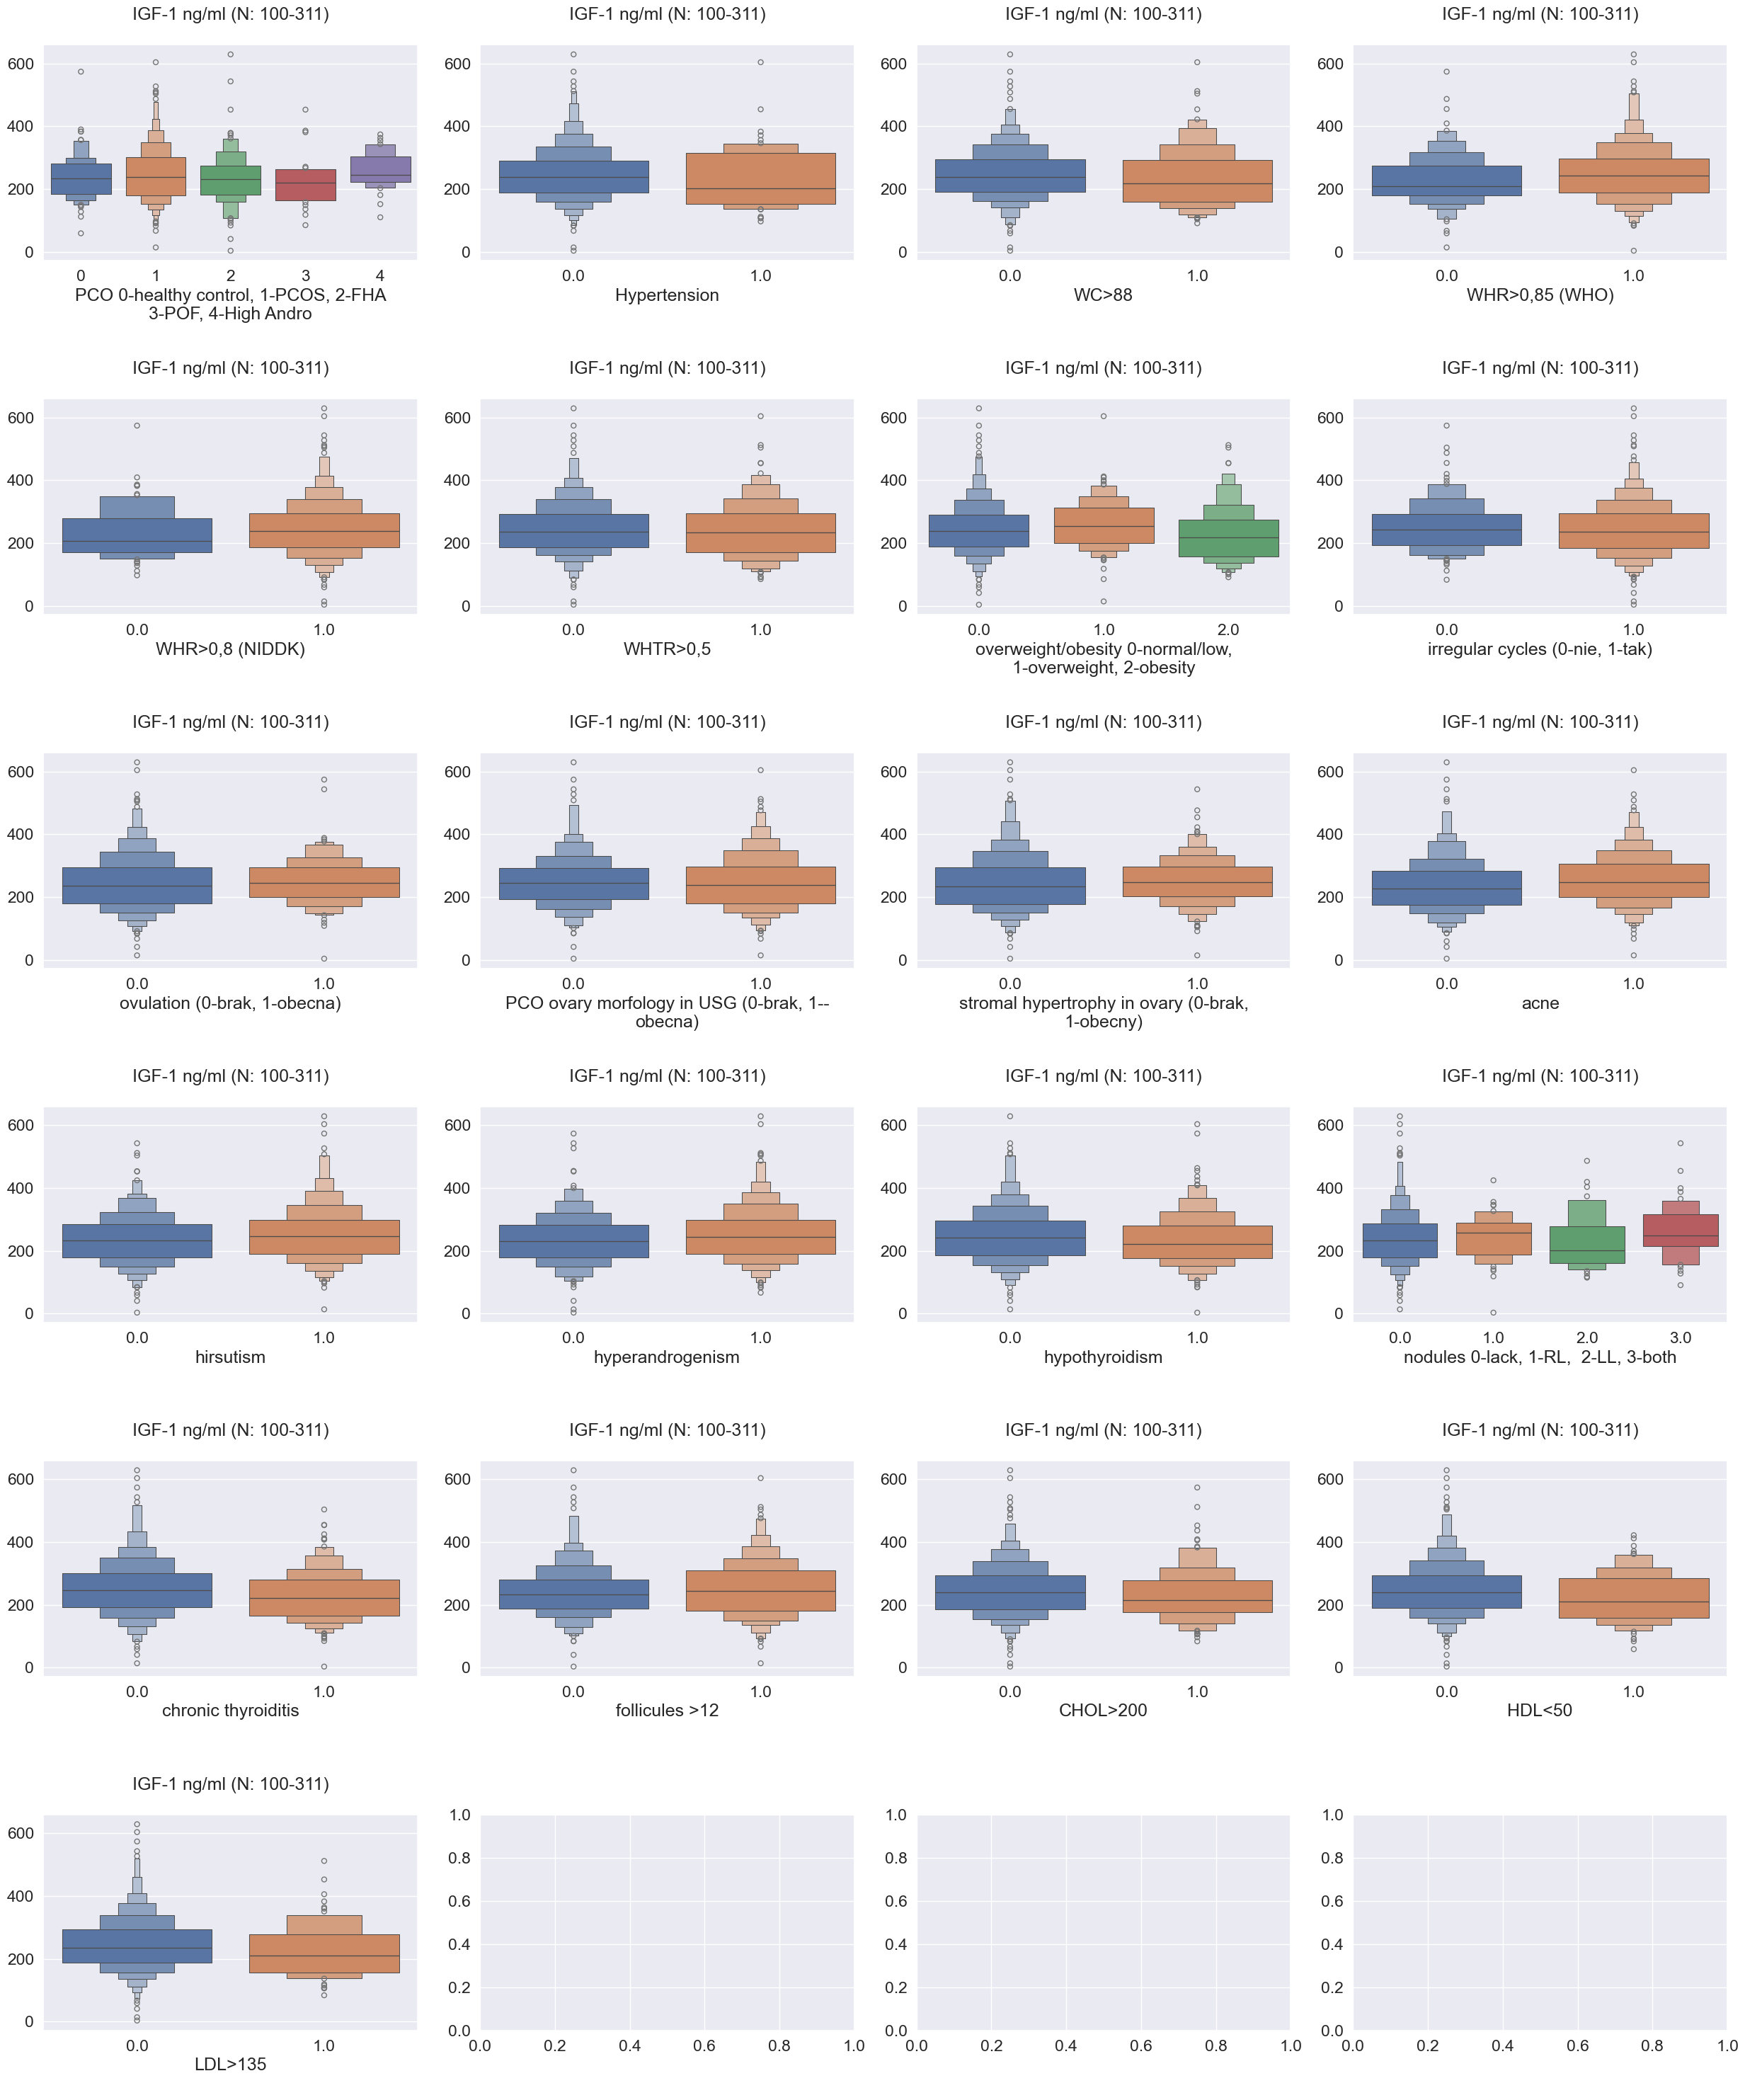

In [49]:
plot_scatterplots_one_to_all_attributes(df, main_attribute=IGF, all_attributes=list(CATEGORICAL_ATTRIBUTES), continuous_data=False, plot_name='IGF-1_vs_categorical_attributes', n_rows=6, n_cols=4, figsize=(25,30))

In [52]:
# plot_scatterplots_one_to_all_attributes(df, main_attribute=VITAMINE_D, all_attributes=list(CATEGORICAL_ATTRIBUTES), continuous_data=False, plot_name='VITAMINE_D_vs_categorical_attributes', n_rows=6, n_cols=4, figsize=(25,60))

In [60]:
# plot diagnosis
def plot_one_categorical_to_all_attributes(df, main_attribute, all_attributes, x_label, continuous_data=True, plot_name='plot', n_rows=29, n_cols=5, figsize=(25, 130)):
    other_attributes = all_attributes
    if main_attribute in other_attributes:
        other_attributes.remove(main_attribute)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    sns.set(font_scale = 1.5)

    for i, other_attribute in enumerate(other_attributes):
        ax = axes[int(i/n_cols)][i%n_cols]

        df_tmp = df.dropna(subset=[main_attribute, other_attribute])

        if continuous_data:
            sns.boxenplot(data=df_tmp, x=main_attribute, y=other_attribute, hue=main_attribute, legend=False, ax=ax, palette="deep")
        else:
            sns.histplot(data=df_tmp, x=main_attribute, hue=other_attribute, multiple="fill", ax=ax, palette="deep")
            legend = ax.get_legend()
            legend.set_title("\n".join(wrap(other_attribute, 40)))
            legend.set_alpha(0.5)  # Adjust the alpha value (0 to 1) as needed

            sns.move_legend(ax, loc='upper right')

            # counts = df_tmp.groupby([main_attribute, other_attribute]).size().reset_index(name='count')
            # sns.scatterplot(data=counts, x=main_attribute, y=other_attribute, ax=ax, size='count', legend=False, sizes=(100, 1000))
        
        ax.set_title("\n".join(wrap(other_attribute, 40)) + '\n')
        # ax.set_xlabel('0-healthy, 1-PCOS, 2-FHA, 3-POF, 4-High Andro')
        ax.set_xlabel("\n".join(wrap(x_label, 40)))
        ax.set_ylabel('')

    fig.tight_layout()
    # plt.savefig(f'charts/{plot_name}.pdf')
    plt.show()

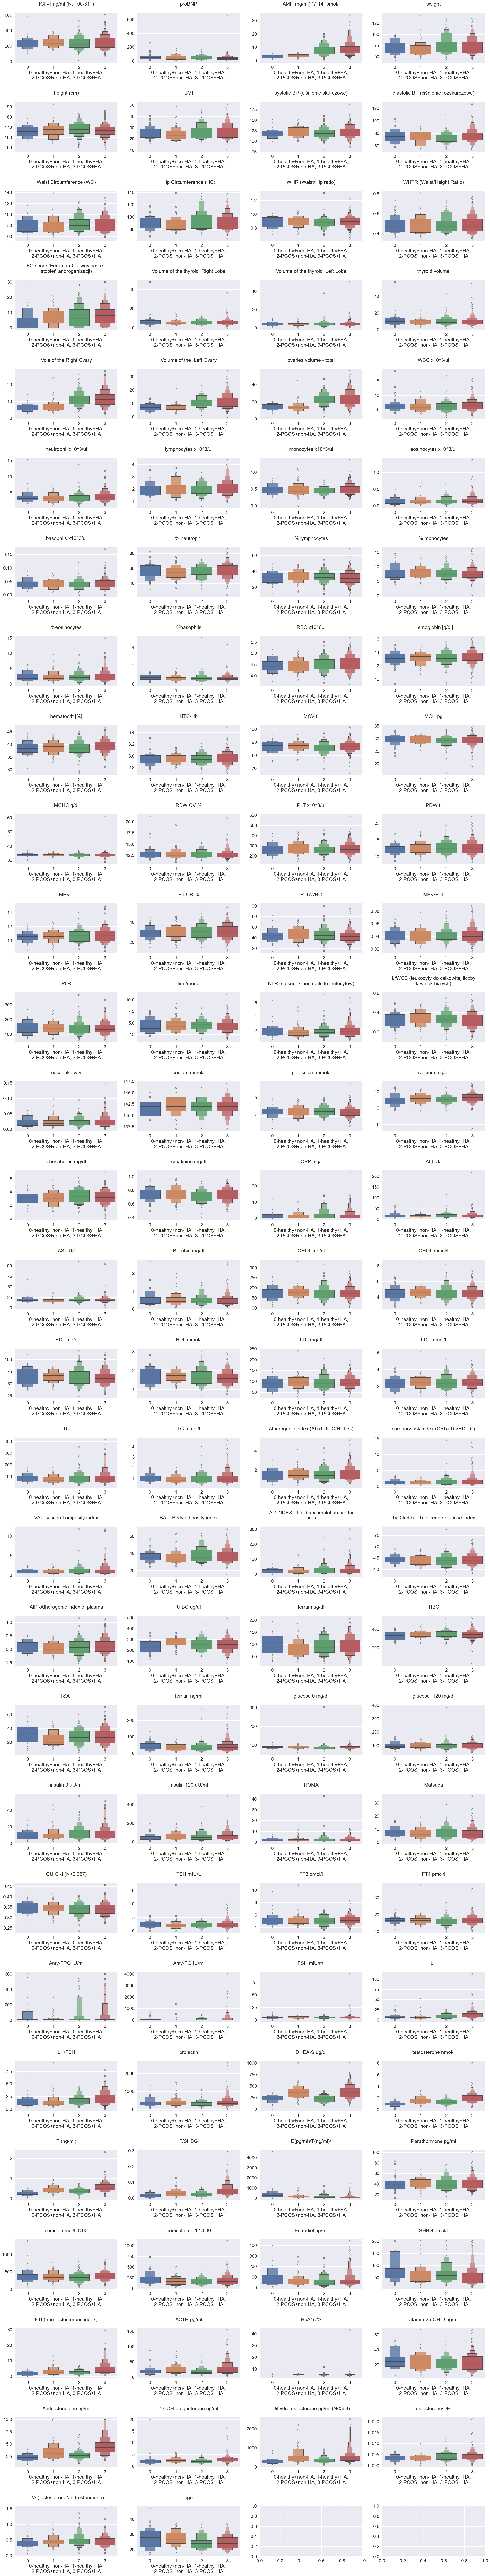

In [62]:
plot_one_categorical_to_all_attributes(df_new, main_attribute='target', all_attributes=list(CONTINUOUS_ATTRIBUTES), x_label='0-healthy+non-HA, 1-healthy+HA, 2-PCOS+non-HA, 3-PCOS+HA', continuous_data=True, plot_name='PCO_vs_continous_attributes', n_rows=29, n_cols=4)

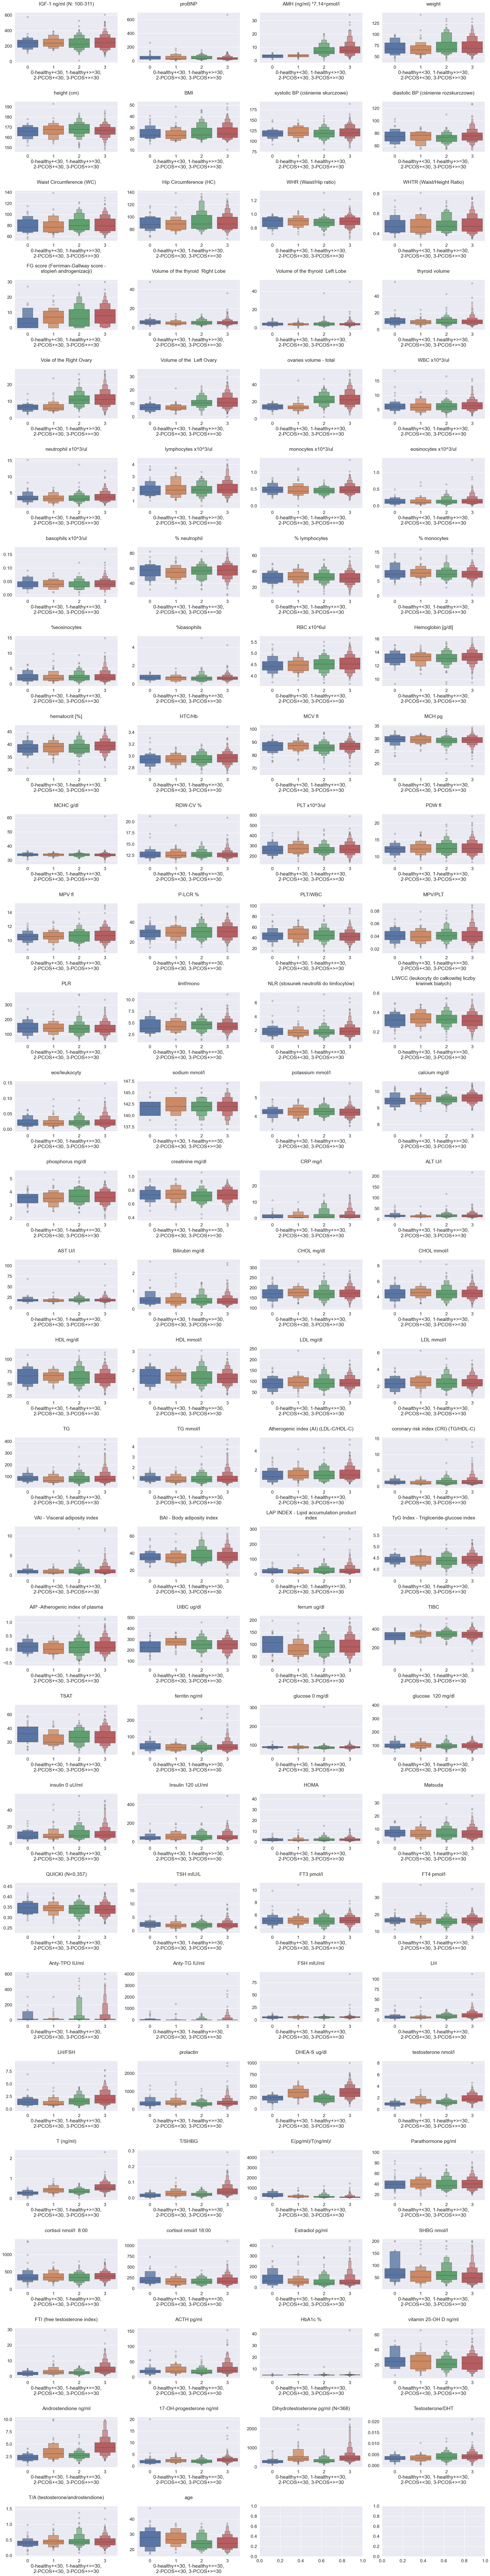

In [63]:
df_age = df.copy()

df_age['target'] = np.where((df_age[PCO] == 0) & (df_age['age'] <  30), 0,
                        np.where((df_age[PCO] == 0) & (df_age['age'] >= 30), 1,
                                 np.where((df_age[PCO] == 1) & (df_age['age'] < 30), 2, 
                                          np.where((df_age[PCO] == 1) & (df_age['age'] >= 30), 3, None))))

plot_one_categorical_to_all_attributes(df_new, main_attribute='target', all_attributes=list(CONTINUOUS_ATTRIBUTES), x_label='0-healthy+<30, 1-healthy+>=30, 2-PCOS+<30, 3-PCOS+>=30', continuous_data=True, plot_name='PCO_vs_continous_attributes', n_rows=29, n_cols=4)

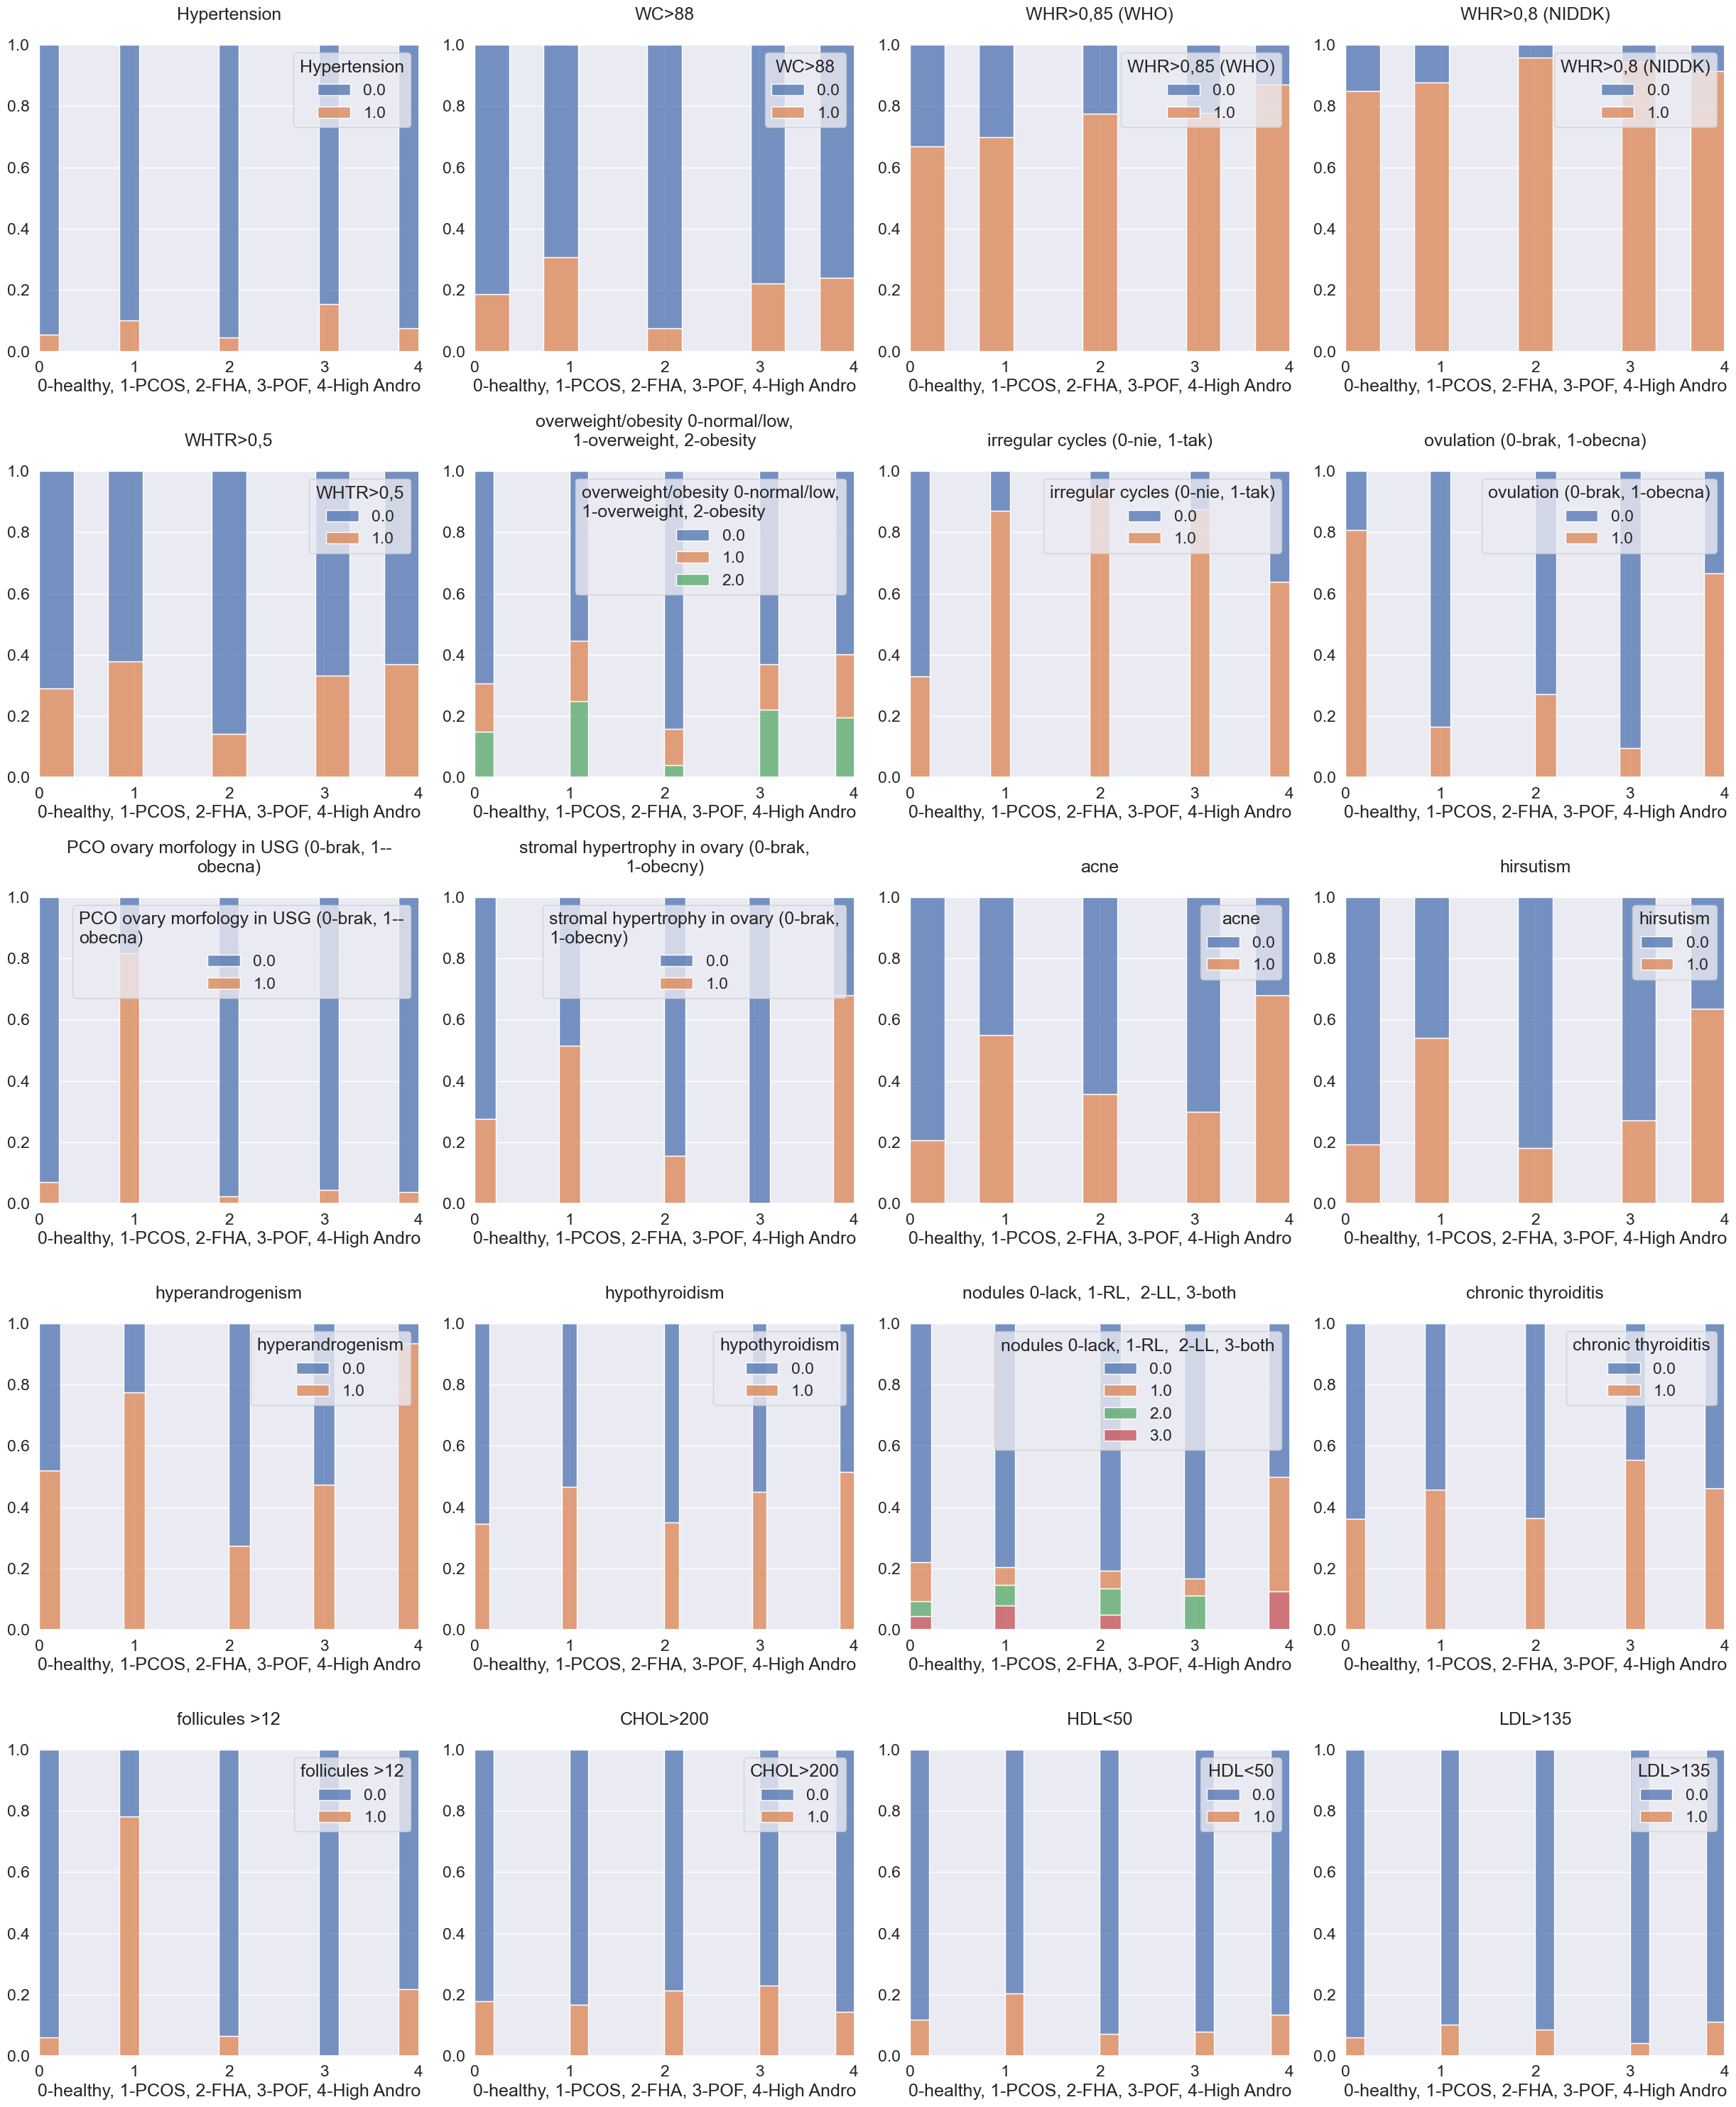

In [20]:
plot_one_categorical_to_all_attributes(df, main_attribute=PCO, all_attributes=list(CATEGORICAL_ATTRIBUTES), x_label='', continuous_data=False, plot_name='PCO_vs_categorical_attributes', n_rows=5, n_cols=4, figsize=(25,30))